# Import libs

In [3]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data

In [4]:
path = 'data/Base_nao_pagos_distancia_para_pagos_20200518.xlsx'
df = pd.read_excel(path)

In [5]:
df.head()

,CD_ALUNO_NAO_PAGO,NM_RESPONSAVEL_NAO_PAGO,CD_ALUNO_PAGO,NM_RESPONSAVEL_PAGO,DISTANCIA_EM_METROS,ORDEM,TELEFONE_PICPAY,CD_DDD1,NR_FONE1,CD_DDD2,NR_FONE2,CD_DDD3,NR_FONE3,CD_DDD4,NR_FONE4
0,10013870,JOSE ROZENO DA SILVA,21231735,ANDREA LOURENCO REQUENA,29.781,1,nan,nan,NaN,nan,NaN,19.000,998002531,nan,NaN
1,10013870,JOSE ROZENO DA SILVA,24247166,SUSANA DA SILVA PORPHIRIO,144.785,2,nan,nan,NaN,nan,NaN,19.000,983115131,nan,NaN
2,10013870,JOSE ROZENO DA SILVA,27899892,ADRIANA CRISTINA SILVA DOS SANTOS,299.847,3,19994591972.000,nan,NaN,nan,NaN,19.000,994591972,nan,NaN
3,10013870,JOSE ROZENO DA SILVA,35512424,GILVANETE GONCALVES RAMOS,359.555,4,nan,nan,NaN,nan,NaN,19.000,996997849,nan,NaN
4,10037134,JOSIANE THAINA PARENTE,27471916,ERICA DE FATIMA MELOTTI,63.184,1,nan,nan,NaN,nan,NaN,14.000,981914492,nan,NaN


In [6]:
df.shape

(415507, 15)

In [7]:
df.count()

CD_ALUNO_NAO_PAGO          415507
NM_RESPONSAVEL_NAO_PAGO    406871
CD_ALUNO_PAGO              415507
NM_RESPONSAVEL_PAGO        415507
DISTANCIA_EM_METROS        415507
ORDEM                      415507
TELEFONE_PICPAY             24159
CD_DDD1                     88907
NR_FONE1                    88907
CD_DDD2                      9071
NR_FONE2                     9071
CD_DDD3                    376542
NR_FONE3                   376542
CD_DDD4                     30515
NR_FONE4                    30515
dtype: int64

In [8]:
df.describe()

,CD_ALUNO_NAO_PAGO,CD_ALUNO_PAGO,DISTANCIA_EM_METROS,ORDEM,TELEFONE_PICPAY,CD_DDD1,CD_DDD2,CD_DDD3,CD_DDD4
count,415507.000,415507.000,415507.000,415507.000,24159.000,88907.000,9071.000,376542.000,30515.000
mean,26966896.772,27473219.258,193.022,2.662,14254164366.292,12.097,12.301,13.042,12.578
std,4413359.609,3640442.750,667.677,1.314,4672973702.715,2.559,3.063,3.498,3.285
min,940.000,9461.000,0.000,1.000,6798563205.000,0.000,0.000,0.000,0.000
25%,24792375.000,25324963.000,22.396,2.000,11961209006.000,11.000,11.000,11.000,11.000
50%,27043602.000,27395908.000,57.307,3.000,11988681728.000,11.000,11.000,11.000,11.000
75%,29678441.000,29856375.500,117.230,4.000,15997086121.000,11.000,12.000,15.000,13.000
max,37264967.000,37126106.000,14689.681,5.000,95991409644.000,99.000,99.000,99.000,99.000


# Remove null and 0

In [9]:
df_sem_null = df.dropna(subset=['NR_FONE3'])

In [10]:
#df_sem_null = df_sem_null[df_sem_null.DISTANCIA_EM_METROS <= 2000]

In [11]:
df_sem_null.head()

,CD_ALUNO_NAO_PAGO,NM_RESPONSAVEL_NAO_PAGO,CD_ALUNO_PAGO,NM_RESPONSAVEL_PAGO,DISTANCIA_EM_METROS,ORDEM,TELEFONE_PICPAY,CD_DDD1,NR_FONE1,CD_DDD2,NR_FONE2,CD_DDD3,NR_FONE3,CD_DDD4,NR_FONE4
0,10013870,JOSE ROZENO DA SILVA,21231735,ANDREA LOURENCO REQUENA,29.781,1,nan,nan,NaN,nan,NaN,19.000,998002531,nan,NaN
1,10013870,JOSE ROZENO DA SILVA,24247166,SUSANA DA SILVA PORPHIRIO,144.785,2,nan,nan,NaN,nan,NaN,19.000,983115131,nan,NaN
2,10013870,JOSE ROZENO DA SILVA,27899892,ADRIANA CRISTINA SILVA DOS SANTOS,299.847,3,19994591972.000,nan,NaN,nan,NaN,19.000,994591972,nan,NaN
3,10013870,JOSE ROZENO DA SILVA,35512424,GILVANETE GONCALVES RAMOS,359.555,4,nan,nan,NaN,nan,NaN,19.000,996997849,nan,NaN
4,10037134,JOSIANE THAINA PARENTE,27471916,ERICA DE FATIMA MELOTTI,63.184,1,nan,nan,NaN,nan,NaN,14.000,981914492,nan,NaN


In [12]:
df_sem_null_e_zero = df_sem_null[df_sem_null['NR_FONE3'] != '0']

# Get only the nearest

In [13]:
#filter_min = df_sem_null_e_zero.groupby(['CD_ALUNO_NAO_PAGO'], sort=False, as_index=False)['ORDEM'].min()

In [14]:
#filter_min.head()

In [15]:
#df_min = pd.merge(df_sem_null_e_zero, filter_min, on=['CD_ALUNO_NAO_PAGO', 'ORDEM'], how='inner')

In [16]:
#df_min.head()

In [17]:
#df_min.shape

In [18]:
#df_min['DISTANCIA_EM_METROS'].describe()

In [19]:
#len(df_min['CD_ALUNO_NAO_PAGO'].value_counts())

In [20]:
df_min = df_sem_null_e_zero

# Plot the distribution

In [21]:
x = df_min['DISTANCIA_EM_METROS']

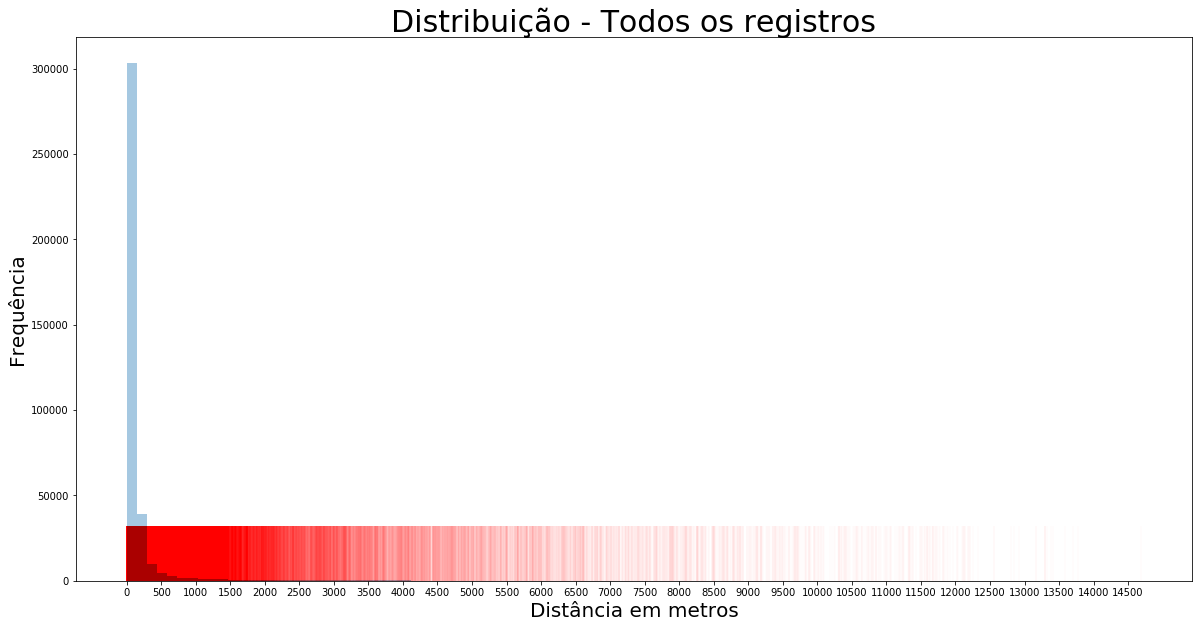

In [22]:
plt.figure(figsize=(20,10))
plt.title('Distribuição - Todos os registros', fontsize=30)
plt.xticks(np.arange(min(x), max(x)+1, 500))
sns.distplot(x, bins=100, kde=False, rug=True,
            rug_kws={"color": "r", "alpha":0.01, "linewidth": 2, "height":0.1 }
            )
plt.ylabel('Frequência', fontsize=20)
plt.xlabel('Distância em metros', fontsize=20)
plt.show()

In [23]:
x = df_min['DISTANCIA_EM_METROS'][df_min['DISTANCIA_EM_METROS'] <= 2000]

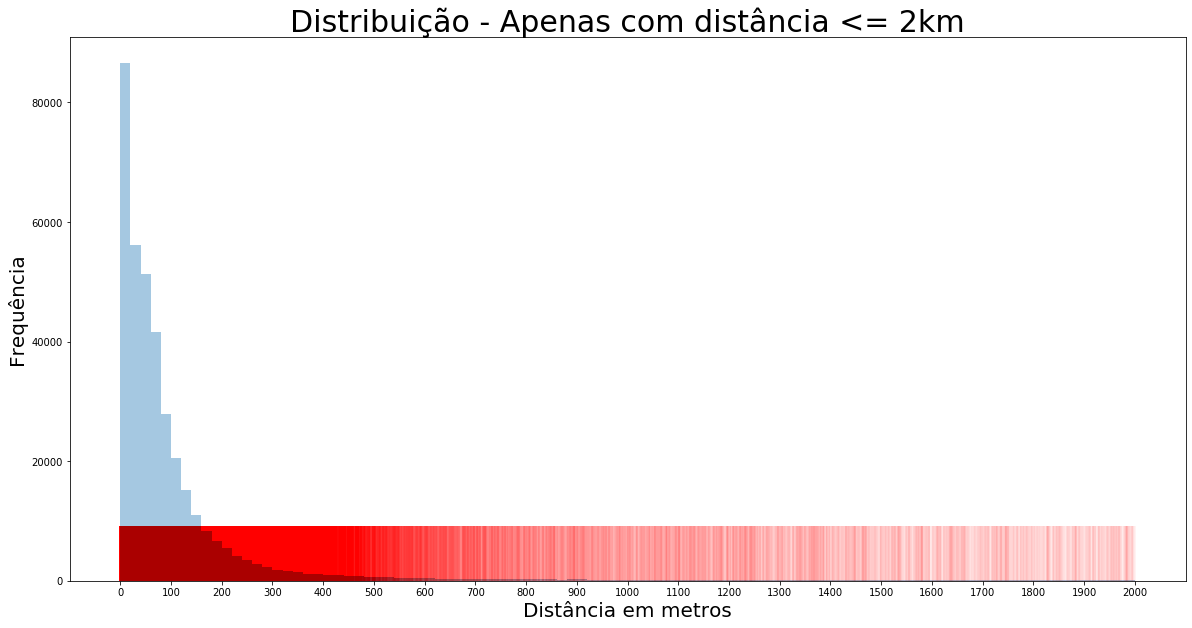

In [24]:
plt.figure(figsize=(20,10))
plt.title('Distribuição - Apenas com distância <= 2km', fontsize=30)
plt.xticks(np.arange(min(x), max(x)+1, 100))
sns.distplot(x, bins=100, kde=False, rug=True,
                        rug_kws={"color": "r", "alpha":0.01, "linewidth": 2, "height":0.1 })
plt.ylabel('Frequência', fontsize=20)
plt.xlabel('Distância em metros', fontsize=20)
plt.show()

In [25]:
x = df_min['DISTANCIA_EM_METROS'][df_min['DISTANCIA_EM_METROS'] <= 1000]

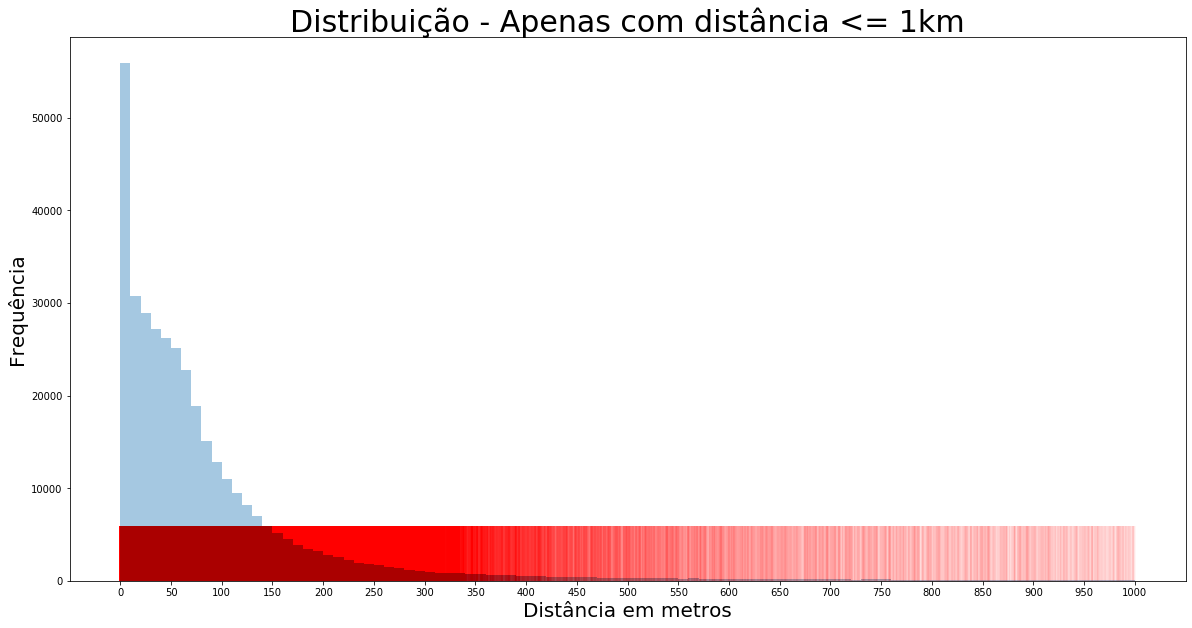

In [26]:
plt.figure(figsize=(20,10))
plt.title('Distribuição - Apenas com distância <= 1km', fontsize=30)
plt.xticks(np.arange(min(x), max(x)+1, 50))
plt.ylabel('Frequência')
sns.distplot(x, bins=100, kde=False, rug=True,
                        rug_kws={"color": "r", "alpha":0.01, "linewidth": 2, "height":0.1 })
plt.ylabel('Frequência', fontsize=20)
plt.xlabel('Distância em metros', fontsize=20)
plt.show()

# Generate final file with distance <= 50 meters

In [27]:
df_min.head()

,CD_ALUNO_NAO_PAGO,NM_RESPONSAVEL_NAO_PAGO,CD_ALUNO_PAGO,NM_RESPONSAVEL_PAGO,DISTANCIA_EM_METROS,ORDEM,TELEFONE_PICPAY,CD_DDD1,NR_FONE1,CD_DDD2,NR_FONE2,CD_DDD3,NR_FONE3,CD_DDD4,NR_FONE4
0,10013870,JOSE ROZENO DA SILVA,21231735,ANDREA LOURENCO REQUENA,29.781,1,nan,nan,NaN,nan,NaN,19.000,998002531,nan,NaN
1,10013870,JOSE ROZENO DA SILVA,24247166,SUSANA DA SILVA PORPHIRIO,144.785,2,nan,nan,NaN,nan,NaN,19.000,983115131,nan,NaN
2,10013870,JOSE ROZENO DA SILVA,27899892,ADRIANA CRISTINA SILVA DOS SANTOS,299.847,3,19994591972.000,nan,NaN,nan,NaN,19.000,994591972,nan,NaN
3,10013870,JOSE ROZENO DA SILVA,35512424,GILVANETE GONCALVES RAMOS,359.555,4,nan,nan,NaN,nan,NaN,19.000,996997849,nan,NaN
4,10037134,JOSIANE THAINA PARENTE,27471916,ERICA DE FATIMA MELOTTI,63.184,1,nan,nan,NaN,nan,NaN,14.000,981914492,nan,NaN


In [28]:
df_min = df_min.drop(columns=['TELEFONE_PICPAY', 'CD_DDD1','NR_FONE1','CD_DDD2','NR_FONE2','CD_DDD4','NR_FONE4'])

In [29]:
df_min = df_min[df_min.DISTANCIA_EM_METROS <= 50]

In [30]:
df_min.head()

,CD_ALUNO_NAO_PAGO,NM_RESPONSAVEL_NAO_PAGO,CD_ALUNO_PAGO,NM_RESPONSAVEL_PAGO,DISTANCIA_EM_METROS,ORDEM,CD_DDD3,NR_FONE3
0,10013870,JOSE ROZENO DA SILVA,21231735,ANDREA LOURENCO REQUENA,29.781,1,19.000,998002531
11,10038856,JOSIANE CANDIDO BUENO DA SILVA,28561475,TATIANA APOLINARIO SOARES,13.073,1,19.000,998876526
16,10047898,ELZA MARQUES,31701874,ALEXANDRE MARQUES GERALDO,0.000,1,11.000,957647210
17,10047898,ELZA MARQUES,32546482,GLENIA RENATA DE SOUZA SANTOS,27.042,2,11.000,987687732
21,10050255,JOSIANE DO NASCIMENTO RODRIGUES DA SILVA,23764205,TATIANA FATIMA DOS SANTOS,29.647,1,12.000,991989039


In [31]:
df_min.shape

(168928, 8)

In [32]:
df_min.to_excel('sms_nao_pagos_proximidade_5.xlsx')